In [10]:
from furlib import *


def newton_raphson(J,b,X0,vals={},eps=1e-5):
    k = 1
    b = b.subs(vals).evalf()
    while True:
        x = ((J.subs(X0).subs(vals).evalf()).inv()*b.subs(X0)).evalf()
        if x.norm()<eps: break
        for jj,ky in enumerate(X0):
            X0[ky] += (x[jj]).evalf()
        k += 1
    return X0,x,k

rad = lambda x: (x*pi/180).evalf()
deg = lambda x: (x*180/pi).evalf()

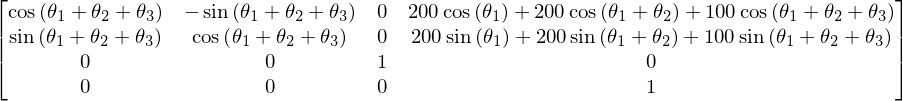

In [25]:
l1,l2,l3 = 200, 200, 100
r = Robot((l1,0,0,t1), (l2,0,0,t2), (l3,0,0,t3))
T = r.T
T

In [56]:
px,py = 200,220
phi = -pi/2
xx = T[0,3]
yy = T[1,3]

In [57]:
f1 = xx - px
f2 = yy - py
f3 = cos(t1+t2+t3) - cos(phi)
f = Matrix([f1,f2,f3])
J = f.jacobian([t1,t2,t3])

X0 = {t1:pi.evalf()/6,t2:-pi.evalf()/3,t3:2*pi.evalf()/3}
xs,*_ = newton_raphson(J,-f,X0)


In [58]:
deg(xs[t1]), deg(xs[t2]), deg(xs[t3])

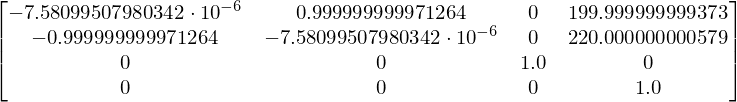

In [51]:
r.T.subs({t1:xs[t1], t2:xs[t2], t3:xs[t3]}).evalf()

In [62]:
l1 = l2 = 200
l3 = 100
t1 =  rad(38.62)
t2 = rad(38.74)
t3 = rad(192.64) 

l1*cos(t1) + l2*cos(t1+t2) + l3*cos(t1+t2+t3), l1*sin(t1) + l2*sin(t1+t2) + l3*sin(t1+t2+t3)